In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('../data/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
data = data.drop(columns='Id')

In [12]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

threshold = 25

discrete_numerical_features = [col for col in numeric_features if data[col].nunique() <= threshold]
numeric_features = [col for col in numeric_features if data[col].nunique() > threshold]

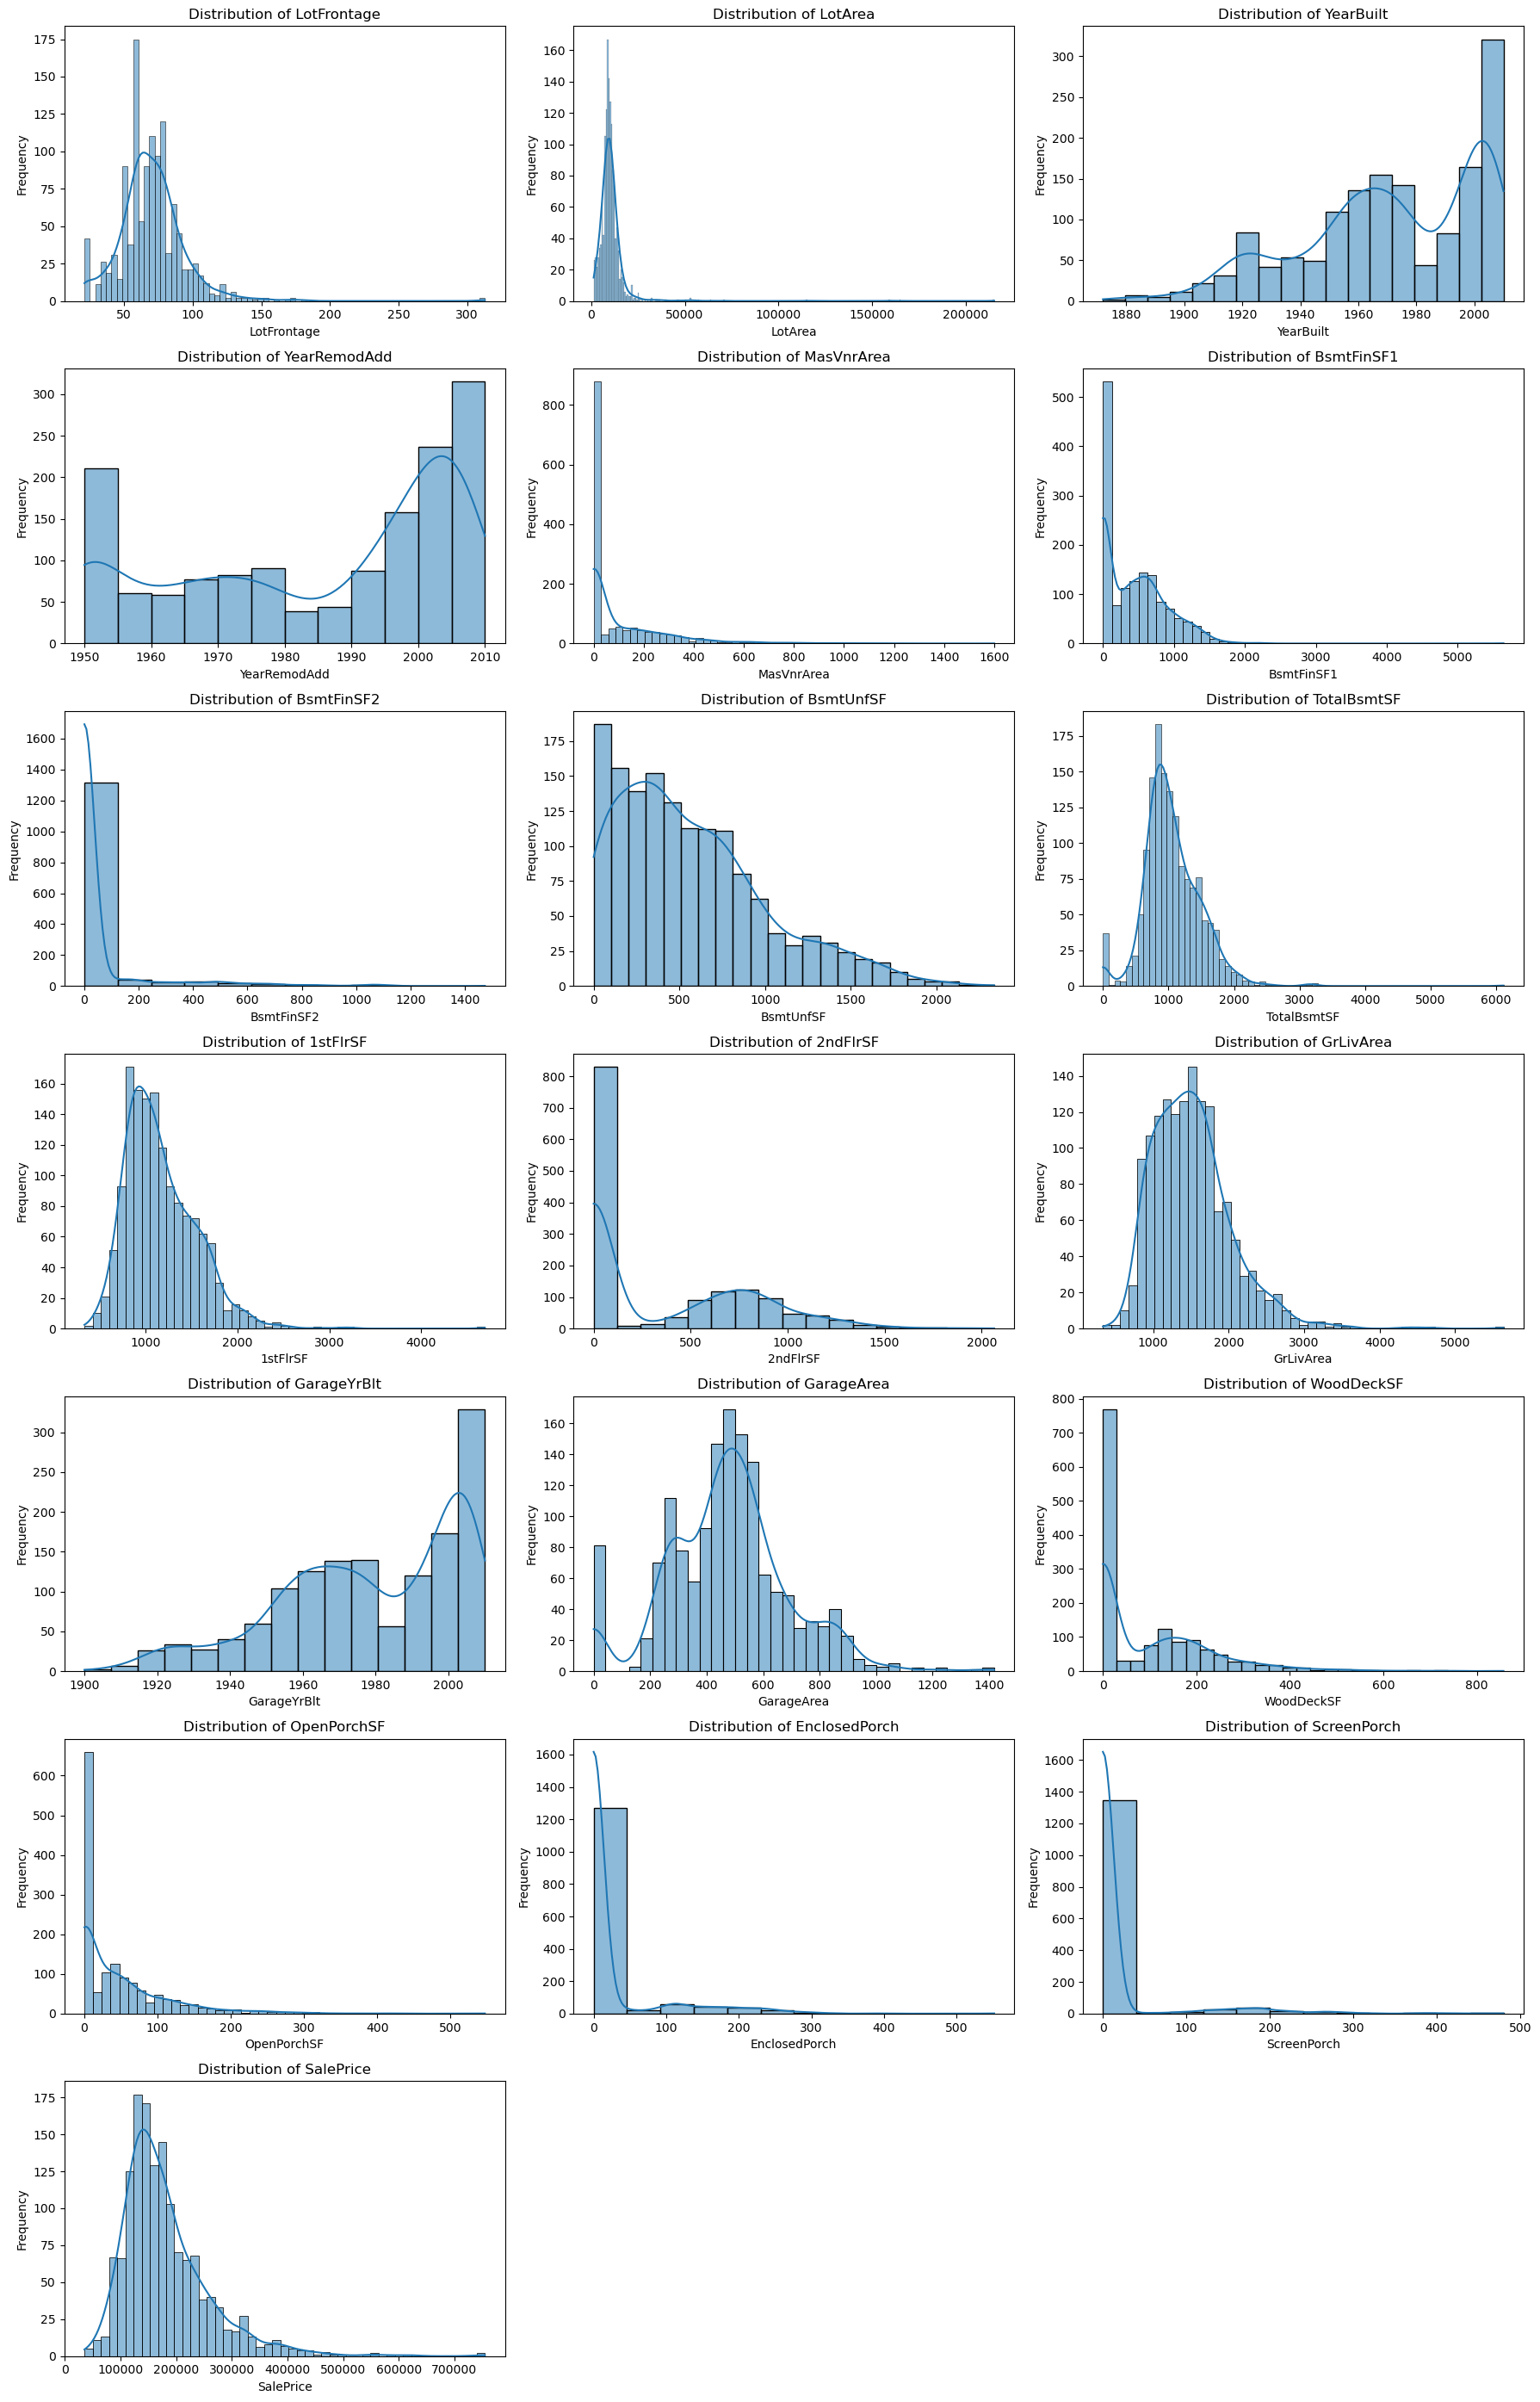

In [13]:

n_cols = 3  # Number of columns for subplots
n_rows = (len(numeric_features) + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate over

# Plot each numeric feature in a separate subplot
for i, column in enumerate(numeric_features):
    sns.histplot(data[column].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


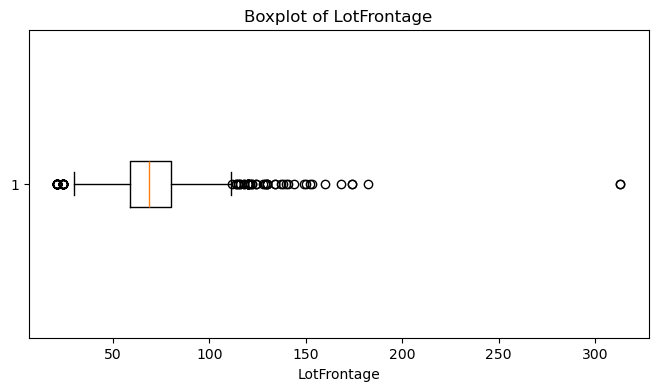

In [16]:
plt.figure(figsize=(8, 4))
plt.boxplot(data['LotFrontage'].dropna(), vert=False)
plt.title('Boxplot of LotFrontage')
plt.xlabel('LotFrontage')
plt.show()

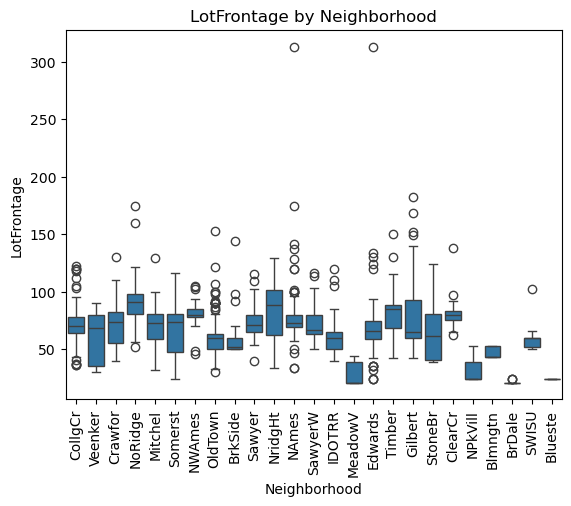

In [17]:
sns.boxplot(x='Neighborhood', y='LotFrontage', data=data)
plt.xticks(rotation=90)
plt.title('LotFrontage by Neighborhood')
plt.show()

In [18]:
neighborhood_stats = data.groupby('Neighborhood')['LotFrontage'].describe()
print(neighborhood_stats)


              count       mean        std   min    25%   50%     75%    max
Neighborhood                                                               
Blmngtn        14.0  47.142857   4.990100  43.0  43.00  43.0   53.00   53.0
Blueste         2.0  24.000000   0.000000  24.0  24.00  24.0   24.00   24.0
BrDale         16.0  21.562500   1.209339  21.0  21.00  21.0   21.00   24.0
BrkSide        51.0  57.509804  15.528519  50.0  50.00  52.0   60.00  144.0
ClearCr        13.0  83.461538  18.875096  62.0  75.00  80.0   83.00  138.0
CollgCr       126.0  71.682540  16.359291  36.0  64.00  70.0   78.00  122.0
Crawfor        41.0  71.804878  19.436074  40.0  55.00  74.0   82.00  130.0
Edwards        92.0  68.217391  32.431780  24.0  58.75  65.5   74.25  313.0
Gilbert        49.0  79.877551  32.748176  42.0  60.00  65.0   93.00  182.0
IDOTRR         34.0  62.500000  18.282712  40.0  50.00  60.0   64.50  120.0
MeadowV        15.0  27.800000  10.107988  21.0  21.00  21.0   38.50   44.0
Mitchel     

In [22]:
print(data.BsmtCond.unique())
print(data.BsmtQual.unique())


['TA' 'Gd' nan 'Fa' 'Po']
['Gd' 'TA' 'Ex' nan 'Fa']


In [23]:
basement_quality_map = {'NoBasement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
data['BsmtCond_encoded'] = data['BsmtCond'].map(basement_quality_map).fillna(0)
data['BsmtQual_encoded'] = data['BsmtQual'].map(basement_quality_map).fillna(0)

# Calculating the correlation
correlation = data['BsmtCond_encoded'].corr(data['BsmtQual_encoded'])
print("Correlation between BsmtCond and BsmtQual:", correlation)

Correlation between BsmtCond and BsmtQual: 0.6337134125275642
